# Ejercicio 4 - guía 8

En un estudio de 100 familias con dos hijos cada una se registraron los sexos de los primeros
y segundos nacidos. El total de niños nacidos es 111 y el total de niñas, 89. Asumamos una prior
uniforme para la probabilidad de que un nacimiento sea un niño.

## a)
Siguiendo el primer ejercicio, computar la distribución posterior para la probabilidad de que
un nacimiento sea un niño. ¿Cuál es el valor del parámetro que maximiza la probabilidad
posterior?

### Desarrollo

Este ejercicio se puede modelar con una distribución binomial para la proporción de varones (que de hecho ya lo sugiere el enunciado del inciso), por lo tanto lo planteo:

In [1]:
import numpy as np 
from scipy.stats import binom
from scipy.stats import uniform

# Defino las cantidades
cant_varones = 111
cant_hembras = 89

# Defino grilla de valores y el prior
grilla_theta = np.linspace(0, 1, 1000)
prior = uniform.pdf(grilla_theta)

# Defino la likelihood para los varones
likelihood_theta_varones = binom.pmf(cant_varones, cant_varones + cant_hembras, grilla_theta)

# Aproximo la posterior
posterior_varones = likelihood_theta_varones * prior   
posterior_varones /= np.trapezoid(posterior_varones, grilla_theta)

Y ahora hago un gráfico de la posterior obtenida para ver cual es **el parámetro que maximiza** la probabilidad posterior:

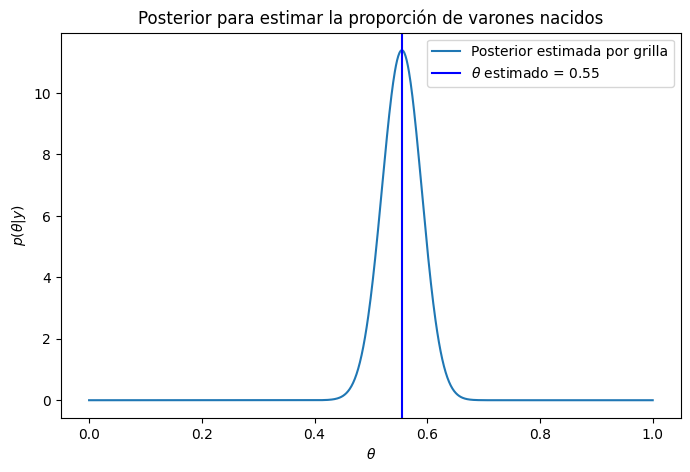

In [2]:
import matplotlib.pyplot as plt

# Calculo el valor del parámetro theta que maximiza la posterior
theta_estimado = grilla_theta[np.argmax(posterior_varones)]

# Hago el gráfico comparativo
plt.figure(figsize=(8, 5))
plt.plot(grilla_theta, posterior_varones, label='Posterior estimada por grilla')
plt.axvline(theta_estimado, ls='-', color='b', label=rf'$\theta$ estimado = {theta_estimado:.2f}')
plt.title('Posterior para estimar la proporción de varones nacidos')
plt.ylabel(r'$p(\theta|y)$')
plt.xlabel(r'$\theta$')
plt.legend()
plt.show()

## b)
Calcular HPDI del 50%, 89% y 97% para el human sex ratio, que es la proporción de nacimientos de niños sobre niñas.

### Desarrollo

Para esto repito los pasos de antes de calcular la posterior de los varones, pero en este caso para las hembras:

In [3]:
likelihood_theta_hembras = binom.pmf(cant_hembras, cant_varones + cant_hembras, grilla_theta)
posterior_hembras = likelihood_theta_hembras * prior   
posterior_hembras /= np.trapezoid(posterior_hembras, grilla_theta)

Ahora tomo samples de ambas distribuciones de la misma longitud, y divido ambos samples, eso me dará un nuevo sample que representa **el human sex ratio que me piden**:

In [4]:
samples_post_varones = np.random.choice(grilla_theta, size=10000, p=posterior_varones / np.sum(posterior_varones))
samples_post_hembras = np.random.choice(grilla_theta, size=10000, p=posterior_hembras / np.sum(posterior_hembras))   

samples_post_sex_ratio = samples_post_varones / samples_post_hembras

Y ahora si calculo los **HPDI que me piden**:

In [5]:
import arviz as az

print(f'50% HDPI: {az.hdi(samples_post_sex_ratio, hdi_prob=0.5)}')
print(f'89% HDPI: {az.hdi(samples_post_sex_ratio, hdi_prob=0.89)}')
print(f'97% HDPI: {az.hdi(samples_post_sex_ratio, hdi_prob=0.97)}')

50% HDPI: [1.14799154 1.31490385]
89% HDPI: [1.0496614 1.4480198]
97% HDPI: [0.98455598 1.53208556]


## c)
A partir de la distribución posterior de la probabilidad de un nacimiento varón, simular 10,000
réplicas de 200 nacimientos y realizar un histograma. ¿El modelo parece ajustar bien a los
datos? Es decir, ¿la distribución de las predicciones incluye la observación real como un
resultado central y probable? ¿Y si se modifica el prior?

### Desarrollo

Paso a hacer un gráfico de la **posterior predictive** de la estimación de proporción de varones:

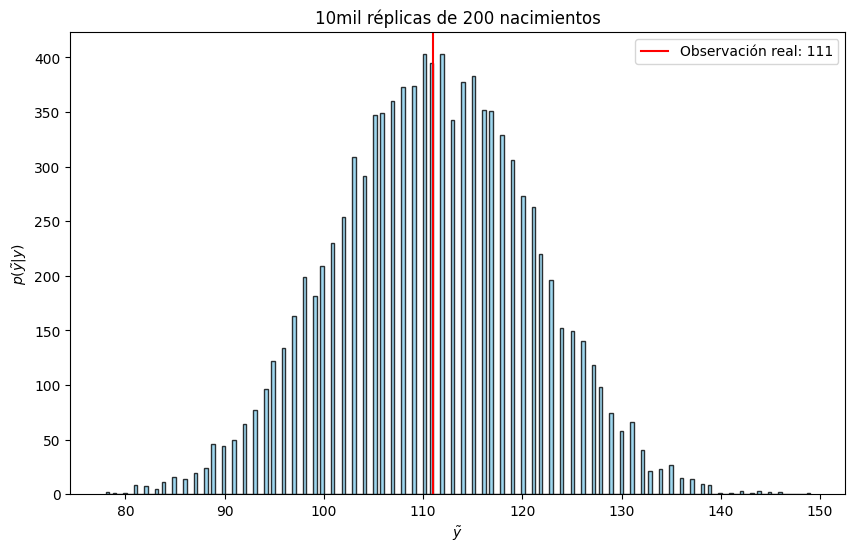

In [9]:
samples_post_predictive_varones = binom.rvs(n = 200, p = samples_post_varones, size = 10000)

# Grafico las muestras
plt.figure(figsize=(10, 6))
plt.hist(samples_post_predictive_varones, bins=200, alpha=0.8, color='skyblue', edgecolor='black')
plt.axvline(111, ls='-', color='r', label= 'Observación real: 111')
plt.ylabel(r'$p(\tilde{y}|y)$')
plt.xlabel(r'$\tilde{y}$')
plt.title('10mil réplicas de 200 nacimientos')
plt.legend()
plt.show()

Y podemos ver que efectivamente **el 111 (valor observado) es un valor central y bastante probable** según las predicciones.